190363X M.Loshanan

Github link:
https://github.com/Loshanan/Image-processing

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

P1 =  [[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]] 

P2 =  [[-1.55882371e+02  1.44377186e+03 -5.42436214e+02  6.81806220e+01]
 [ 1.34928131e+03 -8.41979541e+01 -7.49443961e+02  1.99929996e+02]
 [-3.40999743e-01 -1.74474039e-01 -9.23730472e-01  6.00850565e-01]]


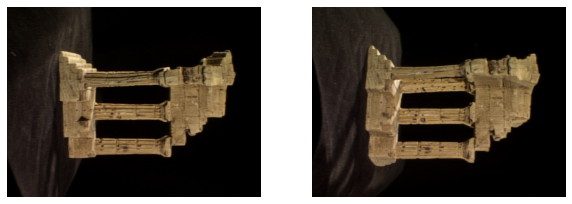

In [2]:
f = open(r'templeSparseRing/templeSR_par.txt', 'r')
assert f is not None

n = int(f.readline())

# Reading information in the first image
l = f.readline().split()
im1_fn = l[0]
K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Reading information in the second image
l = f.readline().split()
im2_fn = l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two images and show
im1 = cv.imread(r'templeSparseRing/' + im1_fn, cv.IMREAD_COLOR)
im2 = cv.imread(r'templeSparseRing/' + im2_fn, cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(im2)
ax[1].axis('off')

# compute P1 and P2
P1 = K1 @ np.hstack((R1, t1)) # P = K*[R|t]
P2 = K2 @ np.hstack((R2, t2)) # P = K*[R|t]

print("P1 = ",P1,'\n')
print("P2 = ", P2)

F =  [[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.55039713e-02  1.65329260e-04  1.78860854e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


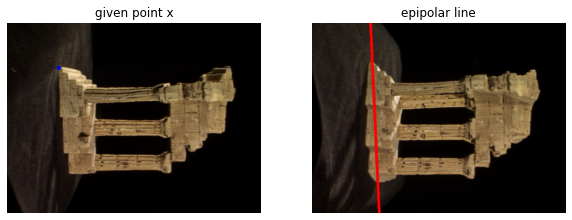

In [3]:

def skew(x):
    x = x.ravel()
    return np.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])

# a = np.array([1,2,3])
# print(skew(a))

C = null_space(P1)
C = C*np.sign(C[0,0])
e2 = P2 @ C
e2x = skew(e2)

F = e2x @ P2 @ np.linalg.pinv(P1)
print('F = ', F)

x = np.array([130, 115, 1])
cv.circle(im1, (x[0], x[1]), 5, (0, 0, 255), -1)
# plt.imshow(im1)
# plt.axis('off')

l2 = F @ x.T
p1 = np.array([0, (l2[0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)
cv.line(im2, (p1[0], p1[1]), (p2[0], p2[1]), (255,0,0), 5)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(im1)
ax[0].axis('off')
ax[0].set_title('given point x')
ax[1].imshow(im2)
ax[1].axis('off')
ax[1].set_title('epipolar line')
plt.show()